In [214]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

In [38]:
# from google.colab import drive
# drivePath = '/content/drive' #please do not change
# drive.mount(drivePath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
problems_pred_df = pd.read_csv(os.path.dirname(os.path.realpath('__file__')) + '/problems_info.csv')
# problems_pred_df = pd.read_csv('/content/drive/MyDrive/Project/problems_info.csv')

In [40]:
problems_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2591 non-null   int64 
 1   Title        2591 non-null   object
 2   Topic Label  2591 non-null   object
 3   Accetpance   2591 non-null   object
 4   Difficulty   2591 non-null   object
 5   Frequency    2591 non-null   object
 6   Accepted     2591 non-null   object
 7   Submissions  2591 non-null   object
 8   Premium      966 non-null    object
dtypes: int64(1), object(8)
memory usage: 182.3+ KB


In [41]:
problems_pred_df.head(5)

,Unnamed: 0,Title,Topic Label,Accetpance,Difficulty,Frequency,Accepted,Submissions,Premium
0,0,208. Implement Trie (Prefix Tree),"['Hash Table', 'String', 'Design', '1+']",62.50%,Medium,26.1195%;,786.6K,1.3M,Y
1,1,1. Two Sum,"['Array', 'Hash Table']",49.60%,Easy,99.4833%;,9.2M,18.5M,NaN
2,2,2. Add Two Numbers,"['Linked List', 'Math', 'Recursion']",40.30%,Medium,94.8402%;,3.5M,8.7M,NaN
3,3,3. Longest Substring Without Repeating Characters,"['Hash Table', 'String', 'Sliding Window']",33.80%,Medium,95.2438%;,4.3M,12.8M,NaN
4,4,4. Median of Two Sorted Arrays,"['Array', 'Binary Search', 'Divide and Conquer']",36.10%,Hard,92.7477%;,1.8M,5.1M,NaN


In [42]:
# pre-processing df
problems_pred_df.rename(columns = {'Unnamed: 0': 'Question ID'}, inplace = True)
problems_pred_df.drop(index = 0, inplace = True)
problems_pred_df['Difficulty'] = problems_pred_df['Difficulty'].map({'Medium' : 2, 'Easy' : 1, 'Hard' : 3})
problems_pred_df['Premium'] = problems_pred_df['Premium'].map({'Y' : 1})
problems_pred_df['Premium'].replace(np.nan, 0, inplace = True)
problems_pred_df.reset_index(drop = True, inplace = True)
# split '%' in 'Accetpance' column, convert to float and standardization
for index in range(len(problems_pred_df['Accetpance'].str.split('%'))):
    problems_pred_df.loc[index, 'Accetpance'] = problems_pred_df['Accetpance'].str.split('%').values[index][0]
problems_pred_df[['Accetpance']] = problems_pred_df[['Accetpance']].astype(float)/100

# split '%' in 'Frequency' column, convert to float and standardization
for index in range(len(problems_pred_df['Frequency'].str.split('%'))):
    problems_pred_df.loc[index, 'Frequency'] = problems_pred_df['Frequency'].str.split('%').values[index][0]
problems_pred_df[['Frequency']] = problems_pred_df[['Frequency']].astype(float)/100

# split 'M' or 'K' in 'Accepted' column, convert to float and standardization
for index in range(len(problems_pred_df)):
    if 'M' in problems_pred_df.loc[index, 'Accepted']:
        problems_pred_df.loc[index, 'Accepted'] = float(problems_pred_df.loc[index, 'Accepted'].split('M')[0]) * 1000000
    elif 'K' in problems_pred_df.loc[index, 'Accepted']:
        problems_pred_df.loc[index, 'Accepted'] = float(problems_pred_df.loc[index, 'Accepted'].split('K')[0]) * 1000

# split 'M' or 'K' in 'Submissions' column, convert to float and standardization
for index in range(len(problems_pred_df)):
    if 'M' in problems_pred_df.loc[index, 'Submissions']:
        problems_pred_df.loc[index, 'Submissions'] = float(problems_pred_df.loc[index, 'Submissions'].split('M')[0]) * 1000000
    elif 'K' in problems_pred_df.loc[index, 'Submissions']:
        problems_pred_df.loc[index, 'Submissions'] = float(problems_pred_df.loc[index, 'Submissions'].split('K')[0]) * 1000

problems_pred_df[['Submissions', 'Accepted', 'Difficulty']].astype(float)

# calculate total label for each question
for index in range(len(problems_pred_df)):
    problems_pred_df.loc[index, 'Label Numbers'] = len(problems_pred_df.loc[index, 'Topic Label'].split(','))

problems_pred_df['Topic Label'] = problems_pred_df['Topic Label'].str.replace('[','').str.replace(']','').str.replace(', ',',')

<ipython-input-42-d40d5e46015b>:38: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  problems_pred_df['Topic Label'] = problems_pred_df['Topic Label'].str.replace('[','').str.replace(']','').str.replace(', ',',')


In [43]:
problems_pred_df.head(5)

,Question ID,Title,Topic Label,Accetpance,Difficulty,Frequency,Accepted,Submissions,Premium,Label Numbers
0,1,1. Two Sum,"'Array','Hash Table'",0.496,1,0.994833,9200000.0,18500000.0,0.0,2.0
1,2,2. Add Two Numbers,"'Linked List','Math','Recursion'",0.403,2,0.948402,3500000.0,8700000.0,0.0,3.0
2,3,3. Longest Substring Without Repeating Characters,"'Hash Table','String','Sliding Window'",0.338,2,0.952438,4300000.0,12800000.0,0.0,3.0
3,4,4. Median of Two Sorted Arrays,"'Array','Binary Search','Divide and Conquer'",0.361,3,0.927477,1800000.0,5100000.0,0.0,3.0
4,5,5. Longest Palindromic Substring,"'String','Dynamic Programming'",0.324,2,0.961759,2300000.0,7200000.0,0.0,2.0


In [44]:
temp = set()
for index in range(len(problems_pred_df)):
    temp.update(problems_pred_df.loc[index, 'Topic Label'].replace('[', '').replace(']', '').replace('\'', '').split(', '))
temp.remove('')

In [45]:
for index in range(len(problems_pred_df)):
    if ',' not in problems_pred_df.loc[index, 'Topic Label']:
        problems_pred_df.loc[index, problems_pred_df.loc[index, 'Topic Label'].replace('\'', '')] = 1
    else:
        for label in problems_pred_df.loc[index, 'Topic Label'].split(','):
            problems_pred_df.loc[index, label.replace('\'', '')] = 1
problems_pred_df.drop('', axis = 1, inplace = True)

In [46]:
problems_pred_df.head(4)

,Question ID,Title,Topic Label,Accetpance,Difficulty,Frequency,Accepted,Submissions,Premium,Label Numbers,...,Rejection Sampling,Segment Tree,Shortest Path,Data Stream,Probability and Statistics,Concurrency,Minimum Spanning Tree,7+,Hash Function,Suffix Array
0,1,1. Two Sum,"'Array','Hash Table'",0.496,1,0.994833,9200000.0,18500000.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2. Add Two Numbers,"'Linked List','Math','Recursion'",0.403,2,0.948402,3500000.0,8700000.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3. Longest Substring Without Repeating Characters,"'Hash Table','String','Sliding Window'",0.338,2,0.952438,4300000.0,12800000.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4. Median of Two Sorted Arrays,"'Array','Binary Search','Divide and Conquer'",0.361,3,0.927477,1800000.0,5100000.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
problems_pred_df.drop(['Title', 'Topic Label', 'Question ID'], axis = 1, inplace = True)
problems_pred_df.fillna(0, inplace = True)

In [48]:
# min-max normalization
min_max_scaler  = preprocessing.MinMaxScaler()

df_scale_min_max = min_max_scaler.fit_transform(problems_pred_df.loc[:, problems_pred_df.columns != 'Difficulty'])
df_scale_min_max = pd.DataFrame(df_scale_min_max,columns = problems_pred_df.columns[problems_pred_df.columns != 'Difficulty'])

# add the label column 'Difficulty' back by join
problems_pred_df = problems_pred_df[['Difficulty']].join(df_scale_min_max)
problems_pred_df.head()

,Difficulty,Accetpance,Frequency,Accepted,Submissions,Premium,Label Numbers,Array,Hash Table,Linked List,...,Rejection Sampling,Segment Tree,Shortest Path,Data Stream,Probability and Statistics,Concurrency,Minimum Spanning Tree,7+,Hash Function,Suffix Array
0,1,0.445274,0.994833,1.000000,1.000000,0.0,0.333333,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.329602,0.948402,0.380422,0.470261,0.0,0.666667,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.248756,0.952438,0.467380,0.691886,0.0,0.666667,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.277363,0.927477,0.195635,0.275663,0.0,0.666667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.231343,0.961759,0.249984,0.389178,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# split train and test dataset
X = problems_pred_df.drop(['Difficulty'], axis = 1).values
y = problems_pred_df['Difficulty'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [126]:
X_train.shape

(2072, 76)

In [209]:
def get_compiled_model():
    model = keras.Sequential([
      keras.layers.Dense(256, activation='softplus'),
      keras.layers.Dense(256, activation='softplus'),
      keras.layers.Dense(256, activation='softplus'),
      keras.layers.Dense(256, activation='softplus'),
      keras.layers.Dense(4, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [212]:
model = get_compiled_model()
# Train the model.
history = model.fit(
    X_train, # training data
    keras.utils.to_categorical(y_train), # training targets in one-hot manner
    epochs = 15,
    batch_size = 66,
    validation_data=(X_test, keras.utils.to_categorical(y_test))
)

Epoch 1/15
32/32 [==============================] - 2s 30ms/step - loss: 1.1585 - accuracy: 0.4701 - val_loss: 1.0185 - val_accuracy: 0.5251
Epoch 2/15
32/32 [==============================] - 1s 20ms/step - loss: 1.0241 - accuracy: 0.5333 - val_loss: 1.0232 - val_accuracy: 0.5251
Epoch 3/15
32/32 [==============================] - 1s 21ms/step - loss: 1.0171 - accuracy: 0.5333 - val_loss: 1.0117 - val_accuracy: 0.5251
Epoch 4/15
32/32 [==============================] - 1s 20ms/step - loss: 1.0109 - accuracy: 0.5333 - val_loss: 1.0153 - val_accuracy: 0.5251
Epoch 5/15
32/32 [==============================] - 1s 20ms/step - loss: 0.9921 - accuracy: 0.5347 - val_loss: 0.9818 - val_accuracy: 0.5290
Epoch 6/15
32/32 [==============================] - 0s 14ms/step - loss: 0.9572 - accuracy: 0.5541 - val_loss: 0.9309 - val_accuracy: 0.5579
Epoch 7/15
32/32 [==============================] - 0s 13ms/step - loss: 0.8956 - accuracy: 0.5748 - val_loss: 0.9309 - val_accuracy: 0.5579
Epoch 8/15
32

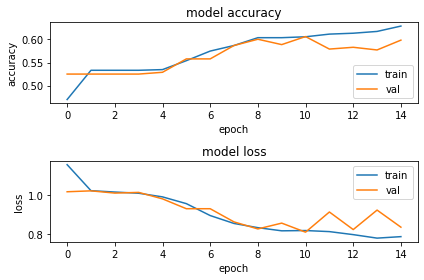

In [213]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()